# データから学習する

ニューラルネットワークの特徴はデータから学習できる点にある。
これは重みパラメータの値を自動で決定できるということである。

# 訓練データとテストデータ

機械学習の問題では訓練データ（教師データ）とテストデータの二つのデータに分けて、学習や実験などを行うのが一般的である。 
その場合、まず訓練データだけを使って学習を行い、最適なパラメータを探索する。そして、テストデータを使用してその訓練したモデルの実力を評価する。    
そして、あるデータセットだけに過度に対応した状態を過学習(overfitting）と呼ぶ。これを避けることは機械学習にとって重要な課題である。

# 損失関数

ニューラルネットワークの学習では、ある一つの指標によって現在の状態を表す。そして、その指標を基準として、最適な重みパラメータの探索を行う。なお、ニューラルネットワークの学習で用いられる指標は損失関数（loss function)と呼ばれる

# 二乗和誤差
損失関数として用いられる関数はいくつかあるが、そのうち最も有名なのが二乗和誤差（sum of aquared error)である。次のような関数でpythonに実装することができる

In [2]:
def sum_squared_error(y, t):    
    return 0.5 * np.sum((y-t)**2)

# 交差エントロピー関数
二乗和誤差と別の損失関数として、交差エントロピー誤差（cross entropy error)もよく用いられる。次のような関数で実装できる

In [3]:
def cross_entropy_error(y, t):    
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# ミニバッチ学習
巨大なデータすべてを対象とした損失関数を計算するのは現実的ではないため、データの中から一部を選び出し、そのデータを全体の近似として利用する。
ニューラルネットワークの学習においても、訓練データからある枚数だけを選び出し（これをミニバッチ（小さな塊）という）そのミニバッチごとに学習を行う。このような学習方法をミニバッチ学習という。    
これを行うために訓練データの中から指定された戸数のデータをランダムに選び出すコードを書く。それに先立ち、MNISTデータセットを読み込むためのコードを次に示す。

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

ModuleNotFoundError: No module named 'dataset'

In [5]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

NameError: name 'x_train' is not defined

# 交差エントロピー誤差の実装
バッチデータに対応した交差エントロピー誤差はうえで実装した一つのデータに対する誤差の者を改良することで簡単に実装できる。

In [6]:
def cross_entropy_error(y, t):    
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [7]:
def cross_entropy_error(y, t):    
    if y.ndim == 1:    
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 数値微分
勾配法では、勾配の情報を使って、進む方向を決める。

# 微分
ある瞬間の変化の量を表したもの

In [8]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h)

# 偏微分

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

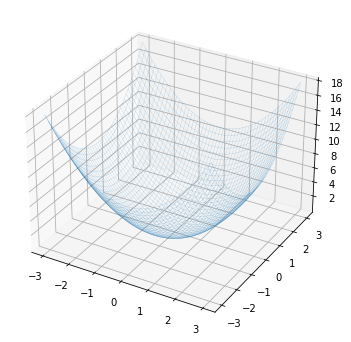

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [0] * 2
t = np.linspace(-3, 3)
x[0] = t
x[1] = t
X = np.meshgrid(x[0], x[1])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection' : '3d'})
ax.plot_wireframe(X[0], X[1], function_2(X), linewidth=0.1)
plt.show()

これは（４．６）の式をpythonに実装したのち、三次元のグラフとして描画したものである。
この式のような複数の変数からなる関数の微分を偏微分という。

# 勾配
すべての変数の偏微分をベクトルとしてまとめたもの。次のように実装できる。

In [11]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)# ｘと同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)の計算
        x[idx] = tmp_val + h
        fxh2 = f(x)
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh = f(x)
        
        grad[idx] = (fxh1 -fxh2) / (2*h)
        x[idx] = tmp_val #値を元に戻す
        
    return grad

勾配が示す方向は、各場所において関数の値を最も減らす方向である。

# 勾配法
現在の場所から勾配方向に一定の距離だけ進み、移動した先でも同様に勾配を求め、またその勾配方向へと進むことを繰り返す。このようにして関数の値を減らすことを勾配法という。

In [12]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# ニューラルネットワークに対する勾配
ここでいう勾配とは、重みパラメータに関する損失関数の勾配である。    
実際に勾配を求める実装を行う。

In [13]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_enttopy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.randam.randn(2,3)# ガウス分布で初期化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

ModuleNotFoundError: No module named 'common'

In [14]:
net = simpleNet()
print(net.W)# 重みパラメータ

NameError: name 'simpleNet' is not defined

In [15]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

NameError: name 'net' is not defined

In [16]:
t = np. array([0, 0, 1])#正解ラベル
net.loss(x, t)

NameError: name 'net' is not defined

続いて、勾配を求める

In [17]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

NameError: name 'net' is not defined